In [1]:
import sys
sys.path.append('../distance_compute')

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from distance_compute import config, filtered_data
config.setConfig(config.speciesType.monkey, config.chainType.beta)
data = filtered_data()
print(data)

fetching data stage
              cdr3_b_aa     v_b_gene    j_b_gene  count
0          CAARITGEKLFF   TRBV6-1*01  TRBJ1-4*01      2
1     CADSRDTLTSGASVLTF  TRBV10-1*01  TRBJ2-6*01      2
2           CAERAGNEQYF   TRBV6-1*01  TRBJ2-7*01      2
3             CAGDQPQYF   TRBV6-1*01  TRBJ1-5*01      1
4       CAGGQEQVSNQPQYF     TRBV9*01  TRBJ1-5*01      1
...                 ...          ...         ...    ...
1299     CSVPPGVHSEKLFF  TRBV29-1*01  TRBJ1-4*01      1
1300      CSVSGTGNEKLFF  TRBV29-1*01  TRBJ1-4*01      4
1301       CTTGSYTAQLFF   TRBV5-8*01  TRBJ2-2*01      1
1302   CVSGFARTASQNTQYF    TRBV13*01  TRBJ2-4*01      1
1303    CVSSYDRRSNQPQYF    TRBV13*01  TRBJ1-5*01      1

[1304 rows x 4 columns]


In [7]:
# Load the data 
df_TRS_only = pd.read_table("../../data/vdjdb_full.tsv")

/Users/liuqianyi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (20,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [46]:
#Gene

# Encode the string test data using LabelEncoder
le = LabelEncoder()
#LabelEncoder是一个预处理工具，用于将分类变量(字符串)编码为数值。
# Encode the string data using LabelEncoder
df_TRS_only[["Gene"]]= df_TRS_only[["Gene"]].apply(lambda col: le.fit_transform(col))

In [47]:
# CDR3
#查看frame的列中是否包含有A-Z字母的字符串的数据，并且统计A-Z每个字母分别出现的个数并且进行打印
df_TRS_only['CDR3'] = df_TRS_only['CDR3'].astype(str)
char_counts_CDR3 = {}

for elem in df_TRS_only['CDR3']:
    for char in elem:
        if char not in char_counts_CDR3:
            char_counts_CDR3[char] = 0
        char_counts_CDR3[char] = char_counts_CDR3[char]


#对CDR3进行编码
def CDR3_encoding(sequence, aa_dict=None):
    if aa_dict is None:
        aa_dict = {'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6,
                   'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12,
                   'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18,
                   'W': 19, 'Y': 20}
    return [aa_dict[aa] for aa in sequence]

#总数
df_TRS_only['CDR3'] = df_TRS_only['CDR3'].apply(lambda x: sum(CDR3_encoding(x)))

#组合数
#df_TRS_only['CDR3'] = df_TRS_only['CDR3'].apply(lambda x: CDR3_encoding(x))

#检查对应总数是否存在重复的情况


In [49]:
#V
#查找V所有的种类，根据种类进行以下操作,
#查看frame列中除数字以外所有其他字符种类，并且计算这些字符出现的次数
'''
df_TRS_only['V'] = df_TRS_only['V'].astype(str)
non_numeric_chars = [char for elem in df_TRS_only['V'] for char in elem if not char.isnumeric()]
char_counts = Counter(non_numeric_chars)
print(char_counts)
'''

df_TRS_only['V'] = df_TRS_only['V'].astype(str)
char_counts_V = {}

for elem in df_TRS_only['V']:
    for char in elem:
        if char not in char_counts_V:
            char_counts_V[char] = 0
        char_counts_V[char] += 1

'''
{'T': 55631, 'R': 55631, 'A': 27820, 'V': 59428, '2': 27007, '6': 6524, '-': 31307, '1': 90086, '*': 55631, '0': 59370, '3': 12869, '8': 6036, '/': 3797, 'D': 4385, '7': 7666, '5': 7089, '4': 9089, '9': 10855, 'N': 883, 'B': 27811, 'n': 18, 'a': 9}
'''


def V_encoding(sequence, aa_dict=None):
    if aa_dict is None:
        aa_dict = {'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8,
                   '8': 9, '9': 10, 'T': 11, 'R': 12, 'A': 13, 'V': 14, '-': 15, '*': 16,
                   '/':17, 'D': 18, 'N': 19, 'B': 20, 'n': 21, 'a': 22}                   
    return [aa_dict[aa] for aa in sequence]
    
#总数
df_TRS_only['V'] = df_TRS_only['V'].apply(lambda x: sum(V_encoding(x)))


#检查对应总数是否存在重复的情况

In [50]:
#J
#查找V所有的种类，根据种类进行以下操作,
df_TRS_only['J'] = df_TRS_only['J'].astype(str)
char_counts_J = {}

for elem in df_TRS_only['J']:
    for char in elem:
        if char not in char_counts_J:
            char_counts_J[char] = 0
        char_counts_J[char] += 1

'''
{'T': 55564, 'R': 55564, 'A': 27820, 'J': 55564, '4': 10829, '3': 14154, '*': 55564, '0': 59210, '1': 78392, '2': 32935, '8': 1965, '5': 8821, '9': 2789, '7': 7210, '6': 3272, 'B': 27744, '-': 27744, 'n': 152, 'a': 76}
'''

def J_encoding(sequence, aa_dict=None):
    if aa_dict is None:
        aa_dict = {'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, 
                   '9': 10, 'T': 11, 'R': 12, 'A': 13, 'J': 23 , '-': 15, '*': 16, 'B': 20, 'n': 21, 'a': 22}                   
    return [aa_dict[aa] for aa in sequence]
    
#总数
df_TRS_only['J'] = df_TRS_only['J'].apply(lambda x: sum(J_encoding(x)))
print(df_TRS_only)

       complex.id  Gene  CDR3    V    J      Species        MHC A MHC B  \
0               1     0   113   96   87  HomoSapiens     HLA-B*08   B2M   
1               2     0   145   73   90  HomoSapiens     HLA-B*08   B2M   
2               4     0   149  158   84  HomoSapiens     HLA-B*08   B2M   
3               5     0   113   96   87  HomoSapiens     HLA-B*08   B2M   
4               6     0   145   73   90  HomoSapiens     HLA-B*08   B2M   
...           ...   ...   ...  ...  ...          ...          ...   ...   
55635       29262     1   120  101  105  HomoSapiens  HLA-A*24:01   B2M   
55636       29263     1   162  103  107  HomoSapiens  HLA-A*24:01   B2M   
55637       29264     1   130  102  105  HomoSapiens  HLA-A*24:01   B2M   
55638       29265     1   203   87  106  HomoSapiens  HLA-A*24:01   B2M   
55639       29266     1   169   98  107  HomoSapiens  HLA-A*24:01   B2M   

      MHC class    Epitope Epitope gene Epitope species      Reference  \
0          MHCI   FLKEKGG

In [51]:
#Species
#使用LabelEncoder()对Species直接进行转换

# Encode the string test data using LabelEncoder
le = LabelEncoder()
#LabelEncoder是一个预处理工具，用于将分类变量(字符串)编码为数值。
# Encode the string data using LabelEncoder
df_TRS_only[["Species"]]= df_TRS_only[["Species"]].apply(lambda col: le.fit_transform(col))

In [52]:
#MHC A

df_TRS_only['MHC A'] = df_TRS_only['MHC A'].astype(str)
char_counts_MHC_A = {}

for elem in df_TRS_only['MHC A']:
    for char in elem:
        if char not in char_counts_MHC_A:
            char_counts_MHC_A[char] = 0
        char_counts_MHC_A[char] += 1

'''
{'H': 55640, 'L': 51340, 'A': 98166, '-': 55640, 'B': 4468, '*': 51316, '0': 96028, '8': 3098, '2': 18362, 'D': 2352, 'Q': 112, '1': 60906, ':': 51206, 'R': 346, 'P': 48, '4': 930, 'K': 2404, 'b': 4250, '3': 27972, '9': 26, 'a': 36, '5': 680, 'E': 32, '7': 1422, '6': 216, 'd': 26, 'C': 28}
'''

def MHC_A_encoding(sequence, aa_dict=None):
    if aa_dict is None:
        aa_dict = {'H': 1, 'L': 2, 'A': 3, '-': 4, 'B': 5, '*': 6, '0': 7, 
                   '8': 8, '2': 9, 'D': 10, 'Q': 11, '1': 12, ':': 13, 'R': 14, 'P': 15, 
                   '4': 16, 'K': 17, 'b': 18, '3': 19, '9': 20, 'a': 21, '5': 22, 'E': 23, '7': 24, 
                   '6': 25, 'd': 26, 'C': 27}                   
    return [aa_dict[aa] for aa in sequence]

df_TRS_only['MHC A'] = df_TRS_only['MHC A'].apply(lambda x: sum(MHC_A_encoding(x)))

In [53]:
#MHC B
df_TRS_only['MHC B'] = df_TRS_only['MHC B'].astype(str)
char_counts_MHC_B = {}

for elem in df_TRS_only['MHC B']:
    for char in elem:
        if char not in char_counts_MHC_B:
            char_counts_MHC_B[char] = 0
        char_counts_MHC_B[char] += 1

'''
{'B': 55476, '2': 55242, 'M': 55084, 'H': 556, 'L': 506, 'A': 656, '-': 556, 'D': 506, 'Q': 90, '1': 1062, '*': 506, '0': 1042, '6': 24, ':': 588, 'R': 368, '5': 30, '3': 96, 'P': 48, '4': 174, 'a': 36, 'E': 14, 'b': 14, '8': 12, '9': 2, '7': 44}
'''


def MHC_B_encoding(sequence, aa_dict=None):
    if aa_dict is None:
        aa_dict = {'B': 1, '2': 2, 'M': 3, 'H': 4, 'L': 5, 'A': 6, '-': 7, 'D': 8, 
                   'Q': 9, '1': 10, '*': 11, '0': 12, '6': 13, ':': 14, 'R': 15, '5': 16, '3': 17, 
                   'P': 18, '4': 19, 'a': 20, 'E': 21, 'b': 22, '8': 23, '9': 24, '7': 25}                   
    return [aa_dict[aa] for aa in sequence]

df_TRS_only['MHC B'] = df_TRS_only['MHC B'].apply(lambda x: sum(MHC_B_encoding(x)))

In [54]:
#MHC class
#使用LabelEncoder()对Species直接进行转换

# Encode the string test data using LabelEncoder
le = LabelEncoder()
#LabelEncoder是一个预处理工具，用于将分类变量(字符串)编码为数值。
# Encode the string data using LabelEncoder
df_TRS_only[["MHC class"]]= df_TRS_only[["MHC class"]].apply(lambda col: le.fit_transform(col))

In [56]:
#Epitope

df_TRS_only['Epitope'] = df_TRS_only['Epitope'].astype(str)
char_counts_Epitope = {}

for elem in df_TRS_only['Epitope']:
    for char in elem:
        if char not in char_counts_Epitope:
            char_counts_Epitope[char] = 0
        char_counts_Epitope[char] += 1
'''
{'F': 23602, 'L': 87808, 'K': 70562, 'E': 5600, 'G': 71366, 'Q': 33606, 'T': 16366, 'M': 6388, 'A': 75466, 
'I': 15360, 'V': 26050, 'Y': 9282, 'D': 11084, 'H': 1494, 'R': 17074, 'N': 7734, 'S': 15042, 'P': 8846, 'W': 2502, 
'C': 2830}
'''
def Epitope_encoding(sequence, aa_dict=None):
    if aa_dict is None:
        aa_dict = {'F': 1, 'L': 2, 'K': 3, 'E': 4, 'G': 5, 'Q': 6, 'T': 7, 
                   'M': 8, 'A': 9, 'I': 10, 'V': 11, 'Y': 12, 'D': 13,
                   'H': 14, 'R': 15, 'N': 16, 'S': 17, 'P': 18, 'W': 19, 'C': 20}                   
    return [aa_dict[aa] for aa in sequence]

df_TRS_only['Epitope'] = df_TRS_only['Epitope'].apply(lambda x: sum(Epitope_encoding(x)))

In [57]:
#Epitope gene

# Encode the string test data using LabelEncoder
le = LabelEncoder()
#LabelEncoder是一个预处理工具，用于将分类变量(字符串)编码为数值。
# Encode the string data using LabelEncoder
df_TRS_only[["Epitope gene"]]= df_TRS_only[["Epitope gene"]].apply(lambda col: le.fit_transform(col))

In [58]:
#Epitope species

# Encode the string test data using LabelEncoder
le = LabelEncoder()
#LabelEncoder是一个预处理工具，用于将分类变量(字符串)编码为数值。
# Encode the string data using LabelEncoder
df_TRS_only[["Epitope species"]]= df_TRS_only[["Epitope species"]].apply(lambda col: le.fit_transform(col))

In [66]:
df_TRS_only = df_TRS_only.drop(['Method'],axis = 1)

In [68]:
df_TRS_only = df_TRS_only.drop(['Meta'],axis = 1)

In [67]:
df_TRS_only = df_TRS_only.drop(['CDR3fix'],axis = 1)

In [69]:
df_TRS_only = df_TRS_only.drop(['Score'],axis = 1)

In [71]:
df_TRS_only = df_TRS_only.drop(['complex.id'],axis = 1)

[[-12.64029318   3.87191432]
 [ 15.49518639 -23.68282791]
 [ 32.34815595  59.67361949]
 ...
 [  5.63355985 -22.22998226]
 [ -3.80940717 -17.71435336]
 [ 12.26417927  34.49267133]]


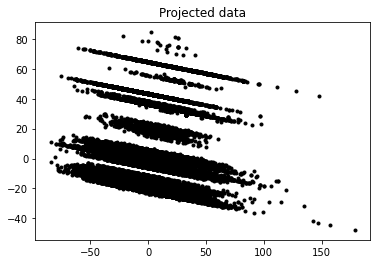

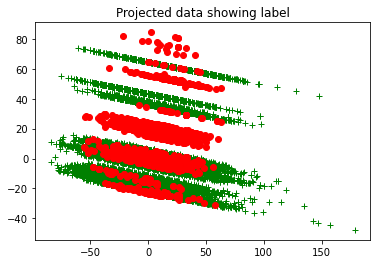

In [83]:
'''
只对CDR3，V，J数据进行PCA降维
'''
#只保留了CDR3，V，J的TRA图
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

Alpha_data = df_TRS_only.loc[df_TRS_only['Gene'] == 0]
Alpha_data = Alpha_data.drop(['Gene'], axis=1)
#a = Alpha_data.loc[:,'Species'].value_counts()




'''

combined_Alpha_MHC = np.concatenate([Alpha_data['MHC A'].values.reshape(-1, 1),
                          Alpha_data['MHC B'].values.reshape(-1, 1),
                          Alpha_data['MHC class'].values.reshape(-1, 1)], axis=1)

combined_Alpha_Epitope = np.concatenate([Alpha_data['Epitope'].values.reshape(-1, 1),
                          Alpha_data['Epitope gene'].values.reshape(-1, 1),
                          Alpha_data['Epitope species'].values.reshape(-1, 1)], axis=1)


# Normalize the data using MinMaxScaler alpha
scaler = MinMaxScaler()
combined_Alpha_MHC_normalized = scaler.fit_transform(combined_Alpha_MHC)


# Normalize the data using MinMaxScaler Epitope
scaler = MinMaxScaler()
combined_Alpha_Epitope_normalized = scaler.fit_transform(combined_Alpha_Epitope)

'''

data = Alpha_data.to_numpy()
ncols = data.shape[1]
X = data[:,0:ncols-7]
label = data[:,ncols-7]



                            
pca = PCA(n_components=2)
pca.fit(X)
# Project data onto first two principal components
projX = pca.transform(X)
print(projX)
plt.figure(4)
plt.plot(projX[:,0], projX[:,1], 'k.')
plt.title('Projected data')
plt.show()

# Now plot the data with a different mark for each label
marks = ('ro', 'g+')
plt.figure(6)
for n in range(0, 2, 1) :
    projClass = projX[np.equal(label, n*np.ones(label.shape))]
    plt.plot(projClass[:,0], projClass[:,1], marks[n-1])

plt.title('Projected data showing label')
plt.show()



       CDR3    V   J  MHC A  MHC B  Epitope  Epitope gene  Gene  \
0       113   96  87     36      6       25           130     0   
1       145   73  90     36      6       25           130     0   
2       149  158  84     36      6       25           130     0   
3       113   96  87     36      6       28           130     0   
4       145   73  90     36      6       28           130     0   
...     ...  ...  ..    ...    ...      ...           ...   ...   
27815   143   99  87     76      6      109           187     0   
27816   111   95  85     76      6      109           187     0   
27817   135   73  83     76      6      109           187     0   
27818   125   76  87     76      6      109           187     0   
27819   133  130  92     76      6      109           187     0   

       Epitope species  MHC class  Species  
0                    9          0        0  
1                    9          0        0  
2                    9          0        0  
3              

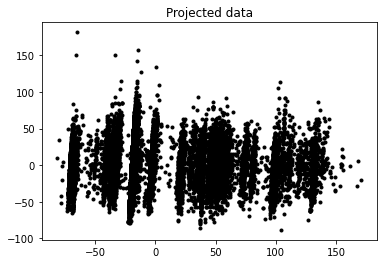

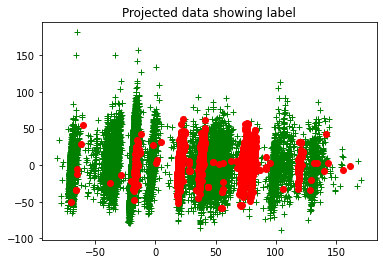

result 0.5290288894047414 result_1 0.17778896770941427


In [151]:
'''
#保留所有可以分类列的数据
'''

Alpha_data_1 = df_TRS_only.loc[df_TRS_only['Gene'] == 0]
order = ['CDR3', 'V', 'J', 'MHC A', 'MHC B', 'Epitope', 'Epitope gene', 'Gene','Epitope species','MHC class', 'Species']
Alpha_data_1 = Alpha_data_1[order]
print(Alpha_data_1)


#a = Alpha_data.loc[:,'Species'].value_counts()

data = Alpha_data_1.to_numpy()
ncols = data.shape[1]
X = data[:,0:ncols-4]
label = data[:,ncols-1]

pca = PCA(n_components=2)
pca.fit(X)
# Project data onto first two principal components
projX = pca.transform(X)
print(projX)
plt.figure(4)
plt.plot(projX[:,0], projX[:,1], 'k.')
plt.title('Projected data')
plt.show()

# Now plot the data with a different mark for each label
marks = ('ro', 'g+')
plt.figure(6)
for n in range(0, 2, 1) :
    projClass = projX[np.equal(label, n*np.ones(label.shape))]
    plt.plot(projClass[:,0], projClass[:,1], marks[n-1])

plt.title('Projected data showing label')
plt.show()

result = pca.explained_variance_ratio_[0]
result_1 =pca.explained_variance_ratio_[1]
print('result',result,'result_1',result_1)




[[ 32.73192518 -16.12357931]
 [ 32.80264083  12.14403927]
 [ 36.48462528  28.41557115]
 ...
 [112.23943169   1.839605  ]
 [112.0472844   -7.61725469]
 [114.57173284   8.08076517]]


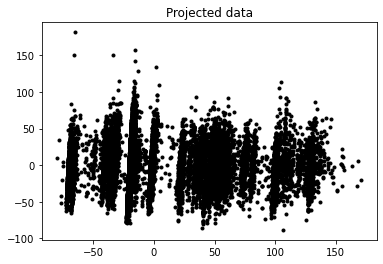

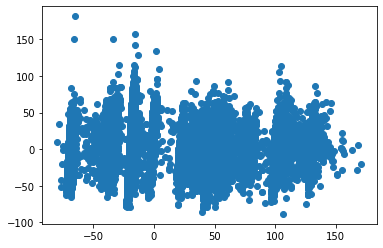

In [122]:

'''
保留除Species以外的所有数据进行降维
'''


Alpha_data_2 = df_TRS_only.loc[df_TRS_only['Gene'] == 0]
order = ['CDR3', 'V', 'J', 'MHC A', 'MHC B', 'Epitope', 'Epitope gene', 'Gene','Epitope species','MHC class', 'Species']
Alpha_data_2 = Alpha_data_2[order]

a = Alpha_data.loc[:,'Epitope species'].value_counts()

data = Alpha_data_2.to_numpy()
ncols = data.shape[1]
X = data[:,0:ncols-1]

label = data[:,ncols-1]

pca = PCA(n_components=2)
pca.fit(X)
# Project data onto first two principal components
projX = pca.transform(X)
print(projX)
plt.figure(4)
plt.plot(projX[:,0], projX[:,1], 'k.')
plt.title('Projected data')
plt.show()

plt.scatter(projX[:, 0],projX[:, 1])
plt.show()

In [149]:
'''
三元组
'''

import matplotlib.pyplot as plt


Alpha_data_3 = df_TRS_only.loc[df_TRS_only['Gene'] == 0]
Alpha_data_3 = Alpha_data_3.drop(['Gene'], axis=1)





combined_Alpha_MHC = np.concatenate([Alpha_data_3['MHC A'].values.reshape(-1, 1),
                          Alpha_data_3['MHC B'].values.reshape(-1, 1),
                          Alpha_data_3['MHC class'].values.reshape(-1, 1)], axis=1)

print(combined_Alpha_MHC)
combined_Alpha_Epitope = np.concatenate([Alpha_data_3['Epitope'].values.reshape(-1, 1),
                          Alpha_data_3['Epitope gene'].values.reshape(-1, 1),
                          Alpha_data_3['Epitope species'].values.reshape(-1, 1)], axis=1)


    
#对不同的数组从1开始赋值


# Use a dictionary to map each unique array to a unique integer
encoded_arrays = {}
current_encoding = 1
for array in arrays:
    if tuple(array) not in encoded_arrays:
        encoded_arrays[tuple(array)] = current_encoding
        current_encoding += 1

# Replace each array in the list with its corresponding encoded integer
encoded_list = [encoded_arrays[tuple(array)] for array in arrays]

print("Encoded list:", encoded_list)



SyntaxError: invalid syntax (1954982567.py, line 29)